In [2]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../../../")

import yaml
import anndata as ad
import matplotlib.pyplot as plt
import mudata as md
import numpy as np
import scanpy as sc
from scipy import sparse
from matplotlib.colors import LinearSegmentedColormap

from utils.utils import *
from utils.plotting import *
from utils.markers import *

sc.settings.verbosity = 0
sc.settings._vector_friendly = True
import matplotlib as mpl
from matplotlib import font_manager
font_dirs = "/usr/share/fonts/truetype/msttcorefonts/"
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "arial"
plt.rcParams['font.size'] = 12
# sc.set_figure_params(transparent=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Global seed set to 0
/opt/conda/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/opt/conda/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


## Load data

In [3]:
mudata = md.read_h5mu("data/anca/exploratory/ANCA_27PK27PB_T_harmony_r_annotated.h5mu")
mod_rna = mudata.mod["rna"]
mod_cite = mudata.mod["cite"]

mudata_cd4 = md.read_h5mu("data/anca/exploratory/ANCA_27PK27PB_cd4emrm_annotated.h5mu")
mod_rna_cd4 = mudata_cd4.mod["rna"]
mod_cite_cd4 = mudata_cd4.mod["cite"]

mudata_cd8 = md.read_h5mu("data/anca/exploratory/ANCA_27PK27PB_cd8emrm_annotated.h5mu")
mod_rna_cd8 = mudata_cd8.mod["rna"]
mod_cite_cd8 = mudata_cd8.mod["cite"]

In [6]:
mod_rna.obs

,patient,sample,tissue,cell_type_yu,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,...,leiden_1.2,leiden_1.3,leiden_1.4,leiden_1.5,leiden_1.6,leiden_1.7,leiden_1.8,leiden_1.9,cell_type,cell_type_v1
P089B_AAACCTGAGAATGTTG-1,E001,P089B,B,CD8 CM/EM,2268,2267,5904.0,357.0,6.046748,1263.0,...,6,8,8,7,7,7,7,7,CD8+ CM/EM,CD8+ Tem
P089B_AAACCTGAGGGCACTA-1,E001,P089B,B,CD8 naive,2011,2009,6245.0,322.0,5.156125,2251.0,...,11,12,12,13,13,13,12,13,CD8+ naive,CD8+ naive
P089B_AAACCTGAGTACCGGA-1,E001,P089B,B,Treg,1638,1637,4184.0,162.0,3.871893,1464.0,...,8,9,9,8,8,8,11,12,Treg,Treg
P089B_AAACCTGAGTGAATTG-1,E001,P089B,B,CD4 naive,1510,1510,4587.0,142.0,3.095705,1836.0,...,4,3,2,2,1,0,0,1,CD4+ naive,CD4+ naive
P089B_AAACCTGGTACCGTAT-1,E001,P089B,B,CD4/CD8 CM,1819,1817,5117.0,194.0,3.791284,1883.0,...,9,10,10,11,10,10,9,9,CD4+ CM,CD4+ Tcm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P137K_TTTCCTCGTCCTGCTT-1,E027,P137K,K,CD8 EM/RM,1201,1200,2493.0,63.0,2.527076,605.0,...,5,4,4,4,4,4,4,4,CD8+ EM/RM,CD8+ Teff
P137K_TTTGCGCGTAAGTTCC-1,E027,P137K,K,CD4 EM/RM,727,727,1120.0,57.0,5.089286,9.0,...,7,7,7,9,9,9,8,8,CD4+/CD8+ stressed,stressed T cells
P137K_TTTGCGCGTAGGCATG-1,E027,P137K,K,CD4/CD8 stressed,637,637,986.0,55.0,5.578093,11.0,...,7,7,7,9,9,9,8,8,CD4+/CD8+ stressed,stressed T cells
P137K_TTTGGTTAGCAACGGT-1,E027,P137K,K,CD8 EM/RM,1191,1191,2509.0,45.0,1.793543,709.0,...,5,4,4,4,4,4,4,4,CD8+ EM/RM,CD8+ Teff


In [8]:
mod_rna.obs.patient.unique()

['E001', 'E002', 'E003', 'E004', 'E005', ..., 'E023', 'E024', 'E025', 'E026', 'E027']
Length: 27
Categories (27, object): ['E001', 'E002', 'E003', 'E004', ..., 'E024', 'E025', 'E026', 'E027']

## Processing

In [5]:
mod_rna_cd4.X = mod_rna_cd4.layers["log1p"].copy()
sc.pp.scale(mod_rna_cd4)
mod_rna_cd4.layers["scaled"] = mod_rna_cd4.X.copy()

mod_rna_cd8.X = mod_rna_cd8.layers["log1p"].copy()
sc.pp.scale(mod_rna_cd8)
mod_rna_cd8.layers["scaled"] = mod_rna_cd8.X.copy()


mod_cite_cd4.X = mod_cite_cd4.layers["clr"].copy()
sc.pp.scale(mod_cite_cd4)
mod_cite_cd4.layers["scaled"] = mod_cite_cd4.X.copy()

mod_cite_cd8.X = mod_cite_cd8.layers["clr"].copy()
sc.pp.scale(mod_cite_cd8)
mod_cite_cd8.layers["scaled"] = mod_cite_cd8.X.copy()

In [6]:
mod_rna.obs["cell_type_v1_merged"] = mod_rna.obs["cell_type_v1"].astype(str)
mod_rna.obs.loc[mod_rna_cd4.obs_names, "cell_type_v1_merged"] = mod_rna_cd4.obs[
    "cell_type_fine"
].astype(str)

mod_rna.obs.loc[mod_rna_cd8.obs_names, "cell_type_v1_merged"] = mod_rna_cd8.obs[
    "cell_type_fine"
].astype(str)

mod_rna.obs["cell_type_v1_merged"] = mod_rna.obs["cell_type_v1_merged"].astype(
    "category"
)

In [7]:
def apply_map(input_list, mapping):
    return [mapping[x] for x in input_list]

In [8]:
celltype_col = "cell_type"
celltype_col = "cell_type_v1"

celltype_map = dict(zip(mod_rna.obs["cell_type"], mod_rna.obs[celltype_col]))

## Patient mixing

In [9]:
color_map = {
    "CD4+ naive": "#1f77b4",
    "CD4+/CD8+ CM": "#ff7f0e",
    "NKT/CTL": "#279e68",
    "CD4+ EM/RM": "#d62728",
    "CD8+ EM/RM": "#aa40fc",
    "CD8+ CM/EM": "#8c564b",
    "CD4+/CD8+ stressed": "#e377c2",
    "Treg": "#b5bd61",
    "CD8+ naive": "#17becf",
    "MAIT": "#ffbb78",
    "Prolif.": "#98df8a",
    "NKT": "#aec7e8",
    "gdT": "#c5b0d5",
    "CD4+ CM": "#ff9896",
    "NK": "#c49c94",
}
color_map = {celltype_map[k]: v for k, v in color_map.items()}

order = [
    "CD4+ EM/RM",
    "CD8+ EM/RM",
    "CD4+ naive",
    "CD4+ CM",
    "CD8+ naive",
    "CD8+ CM/EM",
    "CD4+/CD8+ CM",
    "CD4+/CD8+ stressed",
    "Treg",
    "gdT",
    "MAIT",
    "NKT/CTL",
    "NKT",
    "NK",
    "Prolif.",
]
order = [celltype_map[x] for x in order]

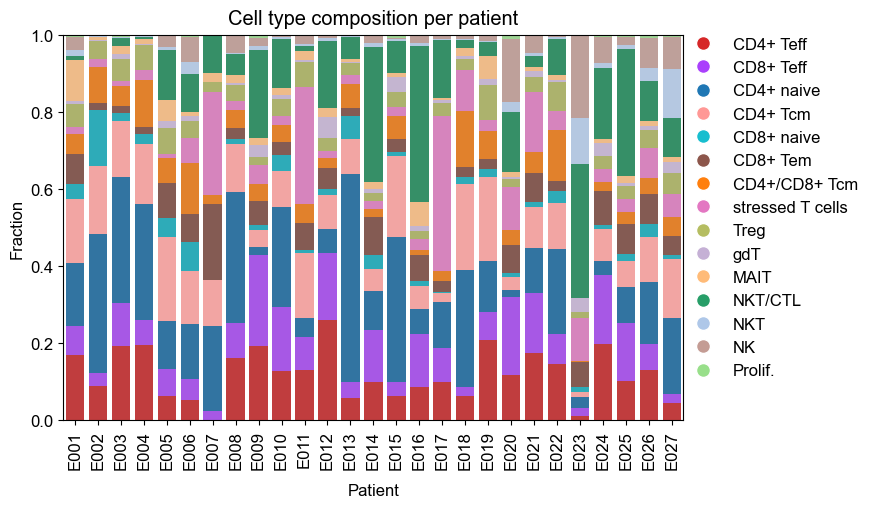

In [12]:
colors = [color_map[x] for x in order]
plot_cluster_composition_per_sample(
    mod_rna,
    colors,
    celltype_col,
    order=order,
    save_path="figures/supp/exploratory_celltype_comp_per_patient.pdf",
    title_pad=8,
)

## Quality control

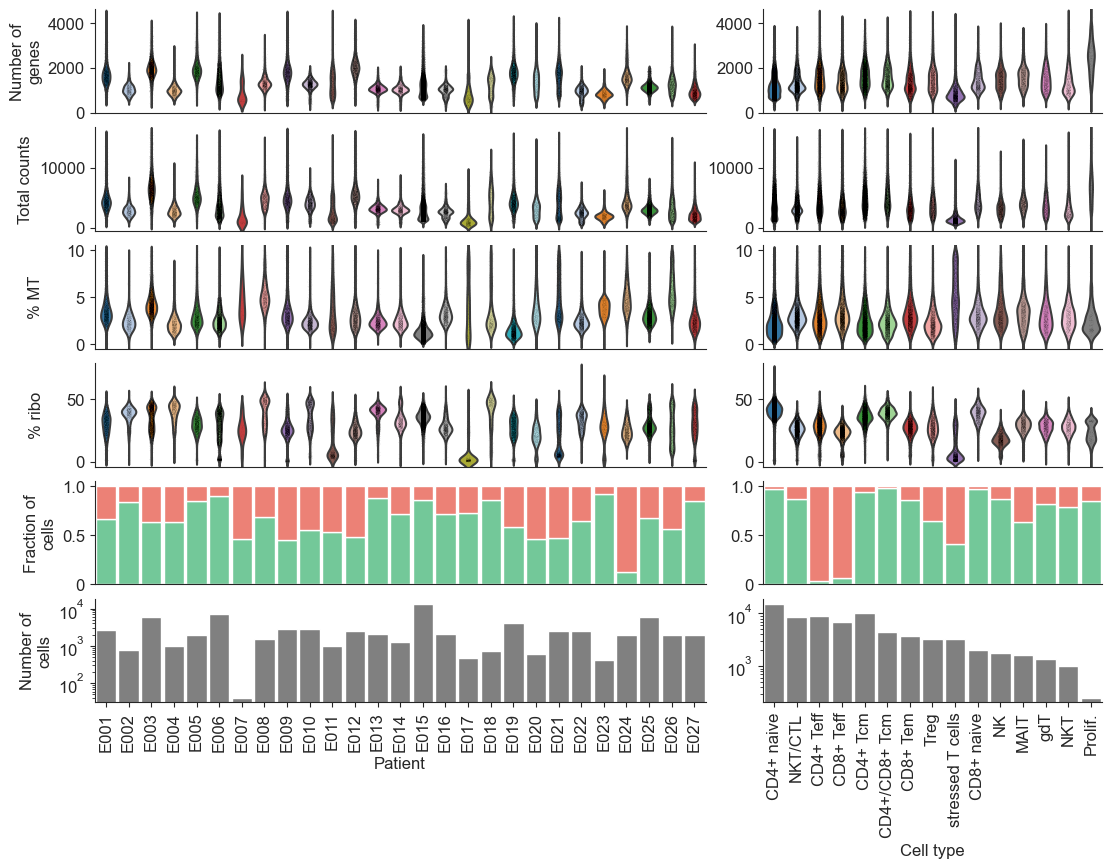

In [13]:
plot_qc(
    mod_rna,
    cell_type_key=celltype_col,
    save_path="figures/supp/exploratory_qc.pdf",
    # log_scale=False,
    hspace=0.14,
)

# Marker dotplots

In [14]:
marker_df = pd.read_excel("data/markers/T cell markers.xlsx")
marker_df = marker_df.set_index("Cell type")

# extract positive markers
marker_db = {}
for index, row in marker_df.iterrows():
    pos_markers_1 = (
        row["positive markers 1"].replace(" ", "").split(",")
        if row["positive markers 1"] is not np.nan
        else []
    )
    pos_markers_2 = (
        row["positive markers 2"].replace(" ", "").split(",")
        if row["positive markers 2"] is not np.nan
        else []
    )
    marker_db[index] = list(set(pos_markers_1 + pos_markers_2))

marker_plotter = MarkerPlotter(mod_rna, mod_cite, marker_db, cluster_key=celltype_col)

marker_plotter = MarkerPlotter(
    mod_rna, mod_cite, marker_db, cluster_key="cell_type_v1_merged"
)

In [17]:
# marker_plotter.visualize_markers(markers=["CD3D", "CD3E"])

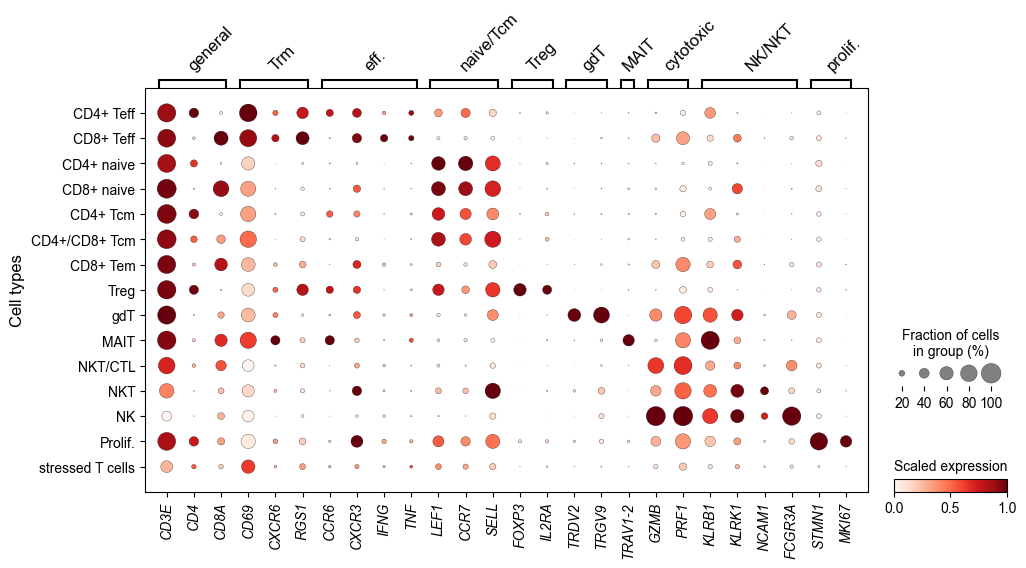

In [15]:
celltype_order = [
    "CD4+ EM/RM",
    "CD8+ EM/RM",
    "CD4+ naive",
    "CD8+ naive",
    "CD4+ CM",
    "CD4+/CD8+ CM",
    "CD8+ CM/EM",
    "Treg",
    "gdT",
    "MAIT",
    "NKT/CTL",
    "NKT",
    "NK",
    "Prolif.",
    "CD4+/CD8+ stressed",
]
celltype_order = apply_map(celltype_order, celltype_map)
dotplot_markers(
    mod_rna,
    celltype_col=celltype_col,
    celltype_order=celltype_order,
    scaled=False,
    marker_dict=get_markers_tcell(),
    # title="Broad T cell markers",
    pad=50,
    rotation=45,
    save_path="figures/supp/exploratory_tcell_markers.pdf",
)

In [19]:
# sc.set_figure_params(dpi=100, fontsize=8)
# ax = sc.pl.heatmap(
#     mod_rna,
#     var_names=marker_dict_tcell_rna,
#     groupby=celltype_col,
#     use_raw=False,
#     cmap="plasma",
#     vmin=0,
#     vmax=3,
#     var_group_rotation=0,
#     show_gene_labels=True,
#     figsize=(10, 5),
#     swap_axes=True,
#     show=False,
# )
# ax["groupby_ax"].set_xlabel("")
# labels = ax["groupby_ax"].set_xticklabels(
#     ax["groupby_ax"].get_xticklabels(), rotation=90, ha="center", fontsize=11
# )

In [20]:
# mod_cite.obs[celltype_col] = mod_rna.obs[celltype_col]
# marker_dict_prot = {
#     "general": ["CD3", "CD4", "CD8"],
#     "Trm": ["CD69"],
#     # "eff.": ["CXCR3", "CCR6"],
#     "naive": [
#         "CD45RA",
#     ],
#     "Tcm": [
#         "CCR7",
#         "CD27",
#         "CD45RO",
#     ],
#     "Treg": [
#         "CD25",
#     ],
#     "gdT": [
#         "TCRVd2",
#         # "TCRVg9",
#         # "TCRgd",
#     ],
#     "MAIT": [
#         "TCRVa7.2",
#     ],
#     "NK/NKT": [
#         # "NKG2D",
#         # "NKp30",
#         # "NKp44",
#         "NKp46",
#     ],
# }
# dotplot_markers(
#     mod_cite,
#     celltype_col=celltype_col,
#     marker_dict=marker_dict_prot,
#     figsize=(5.6, 5),
#     mod="cite",
# )

## CD4 subset RNA

In [21]:
cmap_cd4 = {
    "Th17": "#7B1717",
    "Th1": "#A91F1F",
    "Tfh": "#E0B093",
    "Th1-like": "#D62728",
    "Tc1-like": "#D2D2D2",
}

labels_cd4 = [
    "Th17",
    "Th1",
    "Th1-like",
    "Tfh",
    "Tc1-like",
]

colors = [cmap_cd4[x] for x in labels_cd4]
orig_col = mod_rna_cd4.obs["cell_type_fine"].copy()
mod_rna_cd4.obs["cell_type_umap"] = pd.Categorical(
    mod_rna_cd4.obs["cell_type_fine"], categories=labels_cd4, ordered=True
)
# plot_umap(
#     mod_rna_cd4,
#     color="cell_type_umap",
#     palette=colors,
#     figsize=(5.5, 5),
#     title="",
#     size=20,
#     # save_path="figures/main/exploratory_umap.pdf",
# )

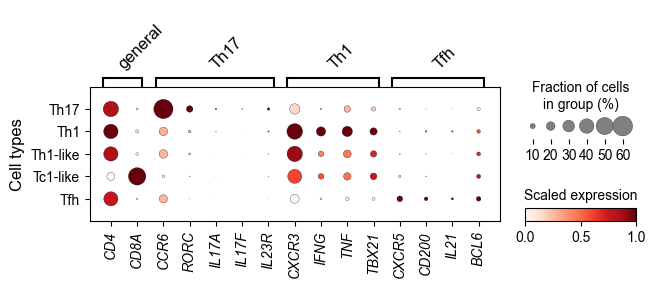

In [22]:
celltype_order = ["Th17", "Th1", "Th1-like", "Tc1-like", "Tfh"]

dotplot_markers(
    mod_rna_cd4,
    celltype_col="cell_type_fine",
    celltype_order=celltype_order,
    marker_dict=get_markers_cd4(),
    # title="CD4+ Teff markers",
    pad=25,
    scaled=False,
    figsize=(7, 3),
    # vmax=0.3,
    rotation=45,
    save_path="figures/supp/exploratory_cd4_markers.pdf",
)

## CD4 subset protein

In [23]:
# mod_cite_cd4.obs["cell_type_fine"] = mod_rna_cd4.obs["cell_type_fine"]
# mod_cite_cd4.obsm["X_umap"] = mod_rna_cd4.obsm["X_umap"]
# marker_dict_cd4_prot = {
#     # "General": ["CD3D", "CD3E", "CD3G", "CD4", "CD8A", "CD8B"],
#     "general": [
#         "CD4",
#         "CD8",
#         # "CD8B",
#     ],
#     "Th17": ["CCR6"],
#     "Th1": ["CXCR3"],
#     "Tfh": ["CXCR5"],
# }
# celltype_order = ["Th17", "Th1", "Th1-like", "Tc1-like", "Tfh"]
# dotplot_markers(
#     mod_cite_cd4,
#     celltype_col="cell_type_fine",
#     celltype_order=celltype_order,
#     marker_dict=marker_dict_cd4_prot,
#     scaled=False,
#     figsize=(4.0, 3),
#     mod="cite",
#     # vmax=0.3,
# )

## CD8 subset RNA

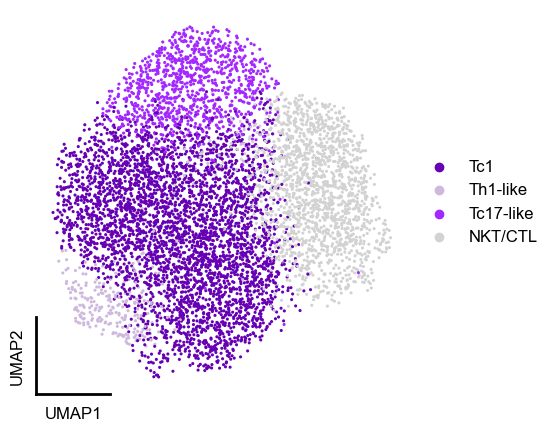

In [24]:
celltype_col_cd8 = "cell_type_fine_v1"
# celltype_col_cd8 = "cell_type_fine"

# cmap_cd8 = {
#     "Tc1": "#6600B4",
#     "Tc1-like": "#840AE2",
#     "Tc17-like": "#A228FF",
#     "Th1-like": "#CEB9DE",
#     "NKT/CTL": "#D2D2D2",
# }

# labels_cd8 = [
#     "Tc1",
#     "Tc1-like",
#     "Tc17-like",
#     "Th1-like",
#     "NKT/CTL",
# ]


cmap_cd8 = {
    "Tc1": "#6600B4",
    # "Tc1-like": "#840AE2",
    "Tc17-like": "#A228FF",
    "Th1-like": "#CEB9DE",
    "NKT/CTL": "#D2D2D2",
}

labels_cd8 = [
    "Tc1",
    "Th1-like",
    # "Tc1-like",
    "Tc17-like",
    "NKT/CTL",
]
colors = [cmap_cd8[x] for x in labels_cd8]
orig_col = mod_rna_cd8.obs[celltype_col_cd8].copy()
mod_rna_cd8.obs["cell_type_umap"] = pd.Categorical(
    mod_rna_cd8.obs[celltype_col_cd8], categories=labels_cd8, ordered=True
)
plot_umap(
    mod_rna_cd8,
    color="cell_type_umap",
    palette=colors,
    figsize=(5.5, 5),
    title="",
    size=20,
    # save_path="figures/main/exploratory_umap.pdf",
)

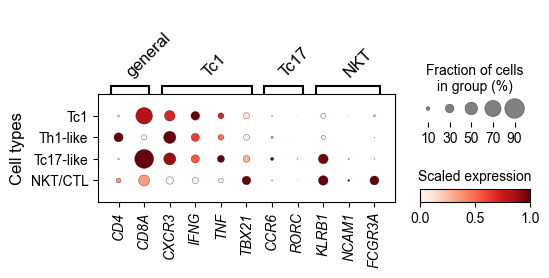

In [25]:
from collections import OrderedDict

celltype_col_cd8 = "cell_type_fine_v1"

celltype_order = ["Tc1", "Tc1-like", "Th1-like", "Tc17-like", "NKT/CTL"]
celltype_order = ["Tc1", "Th1-like", "Tc17-like", "NKT/CTL"]

markers = get_markers_cd8(mod_rna_cd8)
del markers["naive/Tcm"]

fig = dotplot_markers(
    mod_rna_cd8,
    celltype_col=celltype_col_cd8,
    celltype_order=celltype_order,
    marker_dict=markers,
    scaled=False,
    figsize=(5.0, 2.6),
    mod="rna",
    # title="CD8+ Teff markers",
    pad=25,
    rotation=45,
    # vmax=0.3,
    save_path="figures/supp/exploratory_cd8_markers.pdf",
    return_fig=True,
)
gene_ax = fig["gene_group_ax"]

## CD8 subset protein

In [26]:
# mod_cite_cd8.obs[celltype_col_cd8] = mod_rna_cd8.obs[celltype_col_cd8]
# mod_cite_cd8.obsm["X_umap"] = mod_rna_cd8.obsm["X_umap"]
# marker_dict_cd8_prot = {
#     "general": ["CD4", "CD8"],
#     "Tc1": [
#         "CXCR3",
#         # "CCR5",
#         # "CD45RO",
#     ],
#     "Tc17": ["CCR6"],
#     # "NKT": ["NCAM1", "KLRB1", "PRF1"],
#     "NKT": [
#         "NKG2D",
#         "NKp30",
#         "NKp44",
#         # "NKp46",
#     ],
# }
# celltype_order = ["Tc1", "Tc1-like", "Th1-like", "Tc17-like", "NKT/CTL"]
# celltype_order = ["Tc1", "Th1-like", "Tc17-like", "NKT/CTL"]

# dotplot_markers(
#     mod_cite_cd8,
#     celltype_col=celltype_col_cd8,
#     celltype_order=celltype_order,
#     marker_dict=marker_dict_cd8_prot,
#     scaled=False,
#     figsize=(4.0, 3),
#     mod="cite",
#     # vmax=0.3,
# )

### Gene scores

In [27]:
th1_genes = [
    "IFNG",
    "IL2",
    "TNF",
    "LTA",
    "CSF2",
    "IL18",
]
th2_genes = [
    "IL4",
    "IL5",
    "IL9",
    "IL13",
    # "IL10",
    # "IL21",
    # "IL6",
]
th17_genes = ["IL17A", "IL17F", "IL22", "IL26"]

gene_list = th1_genes + th2_genes + th17_genes

mod_rna.X = mod_rna.layers["scaled"].copy()

cytokine_markers = gene_list
sc.tl.score_genes(
    mod_rna,
    gene_list=cytokine_markers,
    score_name="cytokine_score",
    ctrl_size=50,
    use_raw=False,
)
sc.tl.score_genes(
    mod_rna,
    gene_list=th1_genes,
    score_name="type1_score",
    ctrl_size=50,
    use_raw=False,
)
sc.tl.score_genes(
    mod_rna,
    gene_list=th2_genes,
    score_name="type2_score",
    ctrl_size=50,
    use_raw=False,
)
sc.tl.score_genes(
    mod_rna,
    gene_list=th17_genes,
    score_name="type3_score",
    ctrl_size=50,
    use_raw=False,
)
mod_rna.X = mod_rna.layers["log1p"].copy()

In [28]:
scores = mod_rna.obs[["type1_score", "type2_score", "type3_score"]].copy()

In [29]:
mod_rna.obs[["type1_score", "type2_score", "type3_score"]] = scores.copy()

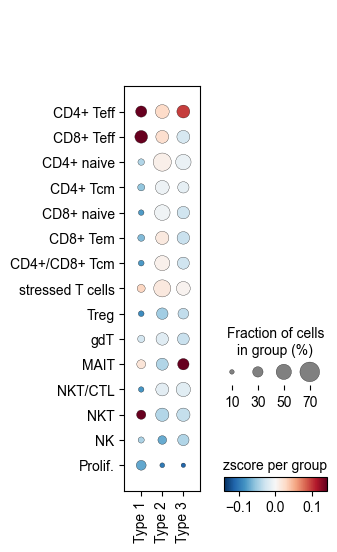

In [30]:
groupby = "cell_type_agg"
groupby = celltype_col

if groupby == "cell_type_agg":
    order = ["CD4+ Teff", "CD8+ Teff", "NKT/CTL", "CD4+ Tcm", "CD4+ naive", "others"]

    mod_rna.obs[groupby] = pd.Categorical(
        mod_rna.obs[groupby], categories=order, ordered=True
    )
else:
    order = [
        "CD4+ EM/RM",
        "CD8+ EM/RM",
        "CD4+ naive",
        "CD4+ CM",
        "CD8+ naive",
        "CD8+ CM/EM",
        "CD4+/CD8+ CM",
        "CD4+/CD8+ stressed",
        "Treg",
        "gdT",
        "MAIT",
        "NKT/CTL",
        "NKT",
        "NK",
        "Prolif.",
    ]
    order = [celltype_map[x] for x in order]
    mod_rna.obs[celltype_col] = pd.Categorical(
        mod_rna.obs[celltype_col], categories=order, ordered=True
    )
swap_axes = True
swap_axes = False
fig = sc.pl.dotplot(
    mod_rna,
    var_names=["type1_score", "type2_score", "type3_score"],
    # groupby="cell_type_agg",
    groupby=groupby,
    color_map="RdBu_r",
    vmin=-0.14,
    vmax=0.14,
    # return_fig=True,
    show=False,
    # title="",
    # size_title=0,
    figsize=(7, 1.5) if swap_axes else None,
    colorbar_title="zscore per group",
    swap_axes=swap_axes,
)
ax = fig["mainplot_ax"]
if swap_axes:
    ax.set_yticklabels(["Type 1", "Type 2", "Type 3"], rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
else:
    ax.set_xticklabels(["Type 1", "Type 2", "Type 3"], rotation=90, ha="center")
plt.savefig(
    "figures/supp/exploratory_cytokine_score_dotplot.pdf",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)
plt.show()